# 02. Segmentation

## 1. Initial Set-Up

In [57]:
# Import Libraries
# =========================================================

# import numpy and pandas
import numpy as np
import pandas as pd

# import libraries for plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
from heatmap import heatmap, corrplot

# Configuration of pandas
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

# Configuration of matplotlib
plt.rcParams['savefig.bbox'] = "tight"



# import sklear for preprocessing functions
from sklearn import preprocessing
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

In [58]:
df_comm_act = pd.read_csv("data/commercial_activity_df.csv")
df_prod = pd.read_csv("data/products_df.csv")
df_socio_dem = pd.read_csv("data/sociodemographic_df.csv")

display(df_comm_act.shape)
display(df_comm_act.head())
display(df_prod.shape)
display(df_prod.head())
display(df_socio_dem.shape)
display(df_socio_dem.head())

(5962924, 7)

,Unnamed: 0,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,0,1375586,2018-01-28,2018-01-12,KHL,1.00,02 - PARTICULARES
1,1,1050611,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
2,2,1050612,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
3,3,1050613,2018-01-28,2015-08-10,KHD,0.00,03 - UNIVERSITARIO
4,4,1050614,2018-01-28,2015-08-10,KHE,1.00,03 - UNIVERSITARIO


(5962924, 18)

,Unnamed: 0,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
1,1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
2,2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
3,3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
4,4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1


(5962924, 9)

,Unnamed: 0,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,0,1375586,2018-01-28,ES,29.00,H,35,N,"87,218.10"
1,1,1050611,2018-01-28,ES,13.00,V,23,N,"35,548.74"
2,2,1050612,2018-01-28,ES,13.00,V,23,N,"122,179.11"
3,3,1050613,2018-01-28,ES,50.00,H,22,N,"119,775.54"
4,4,1050614,2018-01-28,ES,50.00,V,23,N,NaN


In [59]:
# Are the pk the same for the 3 tables?

df_comm_act = df_comm_act.drop(columns='Unnamed: 0')
df_prod = df_prod.drop(columns='Unnamed: 0')
df_socio_dem = df_socio_dem.drop(columns='Unnamed: 0')

display(df_comm_act.shape)
display(df_comm_act.head())
display(df_prod.shape)
display(df_prod.head())
display(df_socio_dem.shape)
display(df_socio_dem.head())

(5962924, 6)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,KHL,1.00,02 - PARTICULARES
1,1050611,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
2,1050612,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
3,1050613,2018-01-28,2015-08-10,KHD,0.00,03 - UNIVERSITARIO
4,1050614,2018-01-28,2015-08-10,KHE,1.00,03 - UNIVERSITARIO


(5962924, 17)

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1


(5962924, 8)

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-28,ES,29.00,H,35,N,"87,218.10"
1,1050611,2018-01-28,ES,13.00,V,23,N,"35,548.74"
2,1050612,2018-01-28,ES,13.00,V,23,N,"122,179.11"
3,1050613,2018-01-28,ES,50.00,H,22,N,"119,775.54"
4,1050614,2018-01-28,ES,50.00,V,23,N,NaN


In [60]:
df = pd.concat([df_comm_act, df_prod, df_socio_dem], axis=1, join="inner")

print(df.shape)

(5962924, 31)


In [61]:
# Drop pk_cid duplicate columns
# ======================================================================================
col_pk_cid = df.iloc[:,0].copy()
col_pk_partition = df.iloc[:,1].copy()
df = df.drop(columns=['pk_cid','pk_partition'],axis = 1)
df['pk_cid']=col_pk_cid
df['pk_partition']=col_pk_partition

df.head().T

,0,1,2,3,4
entry_date,2018-01-12,2015-08-10,2015-08-10,2015-08-10,2015-08-10
entry_channel,KHL,KHE,KHE,KHD,KHE
active_customer,1.00,0.00,0.00,0.00,1.00
segment,02 - PARTICULARES,03 - UNIVERSITARIO,03 - UNIVERSITARIO,03 - UNIVERSITARIO,03 - UNIVERSITARIO
short_term_deposit,0,0,0,1,0
loans,0,0,0,0,0
mortgage,0,0,0,0,0
funds,0,0,0,0,0
securities,0,0,0,0,0
long_term_deposit,0,0,0,0,0


In [62]:
# Create Date column
# ======================================================================================
df['pk_partition'] = pd.to_datetime(df['pk_partition'], format='%Y-%m-%d')
df['year'] = df['pk_partition'].dt.year
df['month'] = df['pk_partition'].dt.month
df['year_month']=pd.to_datetime(df['pk_partition']).dt.to_period('M')

In [63]:
# Create Region_Name column
# ======================================================================================
df['region_code'].fillna(999, inplace=True)

regions={1:'Alava',
         2:'Albacete',
         3:'Alicante',
         4:'Almeria',
         5:'Avila',
         6:'Badajoz',
         7:'Baleares',
         8:'Barcelona',
         9:'Burgos',
         10:'Caceres',
         11:'Cadiz',
         12:'Castellon',
         13:'Ciudad Real',
         14:'Cordoba',
         15:'La Coruna',
         16:'Cuenca',
         17:'Gerona',
         18:'Granada',
         19:'Guadalajara',
         20:'Guipuzcoa',
         21:'Huelva',
         22:'Huesca',
         23:'Jaen',
         24:'Leon',
         25:'Lerida',
         26:'La Rioja',
         27:'Lugo',
         28:'Madrid',
         29:'Malaga',
         30:'Murcia',
         31:'Navarra',
         32:'Orense',
         33:'Asturias',
         34:'Palencia',
         35:'Las Palmas',
         36:'Pontevedra',
         37:'Salamanca',
         38:'Santa Cruz de Tenerife',
         39:'Cantabria',
         40:'Segovia',
         41:'Sevilla',
         42:'Soria',
         43:'Tarragona',
         44:'Teruel',
         45:'Toledo',
         46:'Valencia',
         47:'Valladolid',
         48:'Vizcaya',
         49:'Zamora',
         50:'Zaragoza',
         51:'Ceuta',
         52:'Melilla',
         999:'Not_available'}

df['region_name']=df['region_code'].map(regions)

In [64]:
product_revenue_map = {"short_term_deposit": 60, 
                       "loans": 40, 
                       "mortgage": 40, 
                       "funds": 60, 
                       "securities": 60, 
                       "long_term_deposit": 60, 
                       "credit_card": 40, 
                       "payroll": 10, 
                       "pension_plan": 60, 
                       "payroll_account": 10, 
                       "emc_account": 10, 
                       "debit_card": 40, 
                       "em_account_p": 10, 
                       "em_acount": 10}

products = list(product_revenue_map.keys())

df_product = df[products]
revenues = np.array([product_revenue_map[f] for f in products])
df["total_revenue"] = (df_product * revenues).sum(axis = 1)
df_user_revenue = df.groupby("pk_cid")["total_revenue"].sum().reset_index()
df = pd.merge(df, df_user_revenue, on = "pk_cid", how = "left")

df.rename(columns = {"total_revenue_x": "revenue_month", "total_revenue_y": "revenue_total"}, inplace = True)

In [65]:
# Drop unnecessary columns
df = df.drop(['entry_date', 'pk_cid', 'pk_partition','deceased','country_id','segment','gender'], axis=1)

# Handle missing values
df = df.dropna()

### Clean-Up DataFrame and features to use

## 2. Bi-Variate Analysis

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 5962923
Data columns (total 33 columns):
 #   Column              Dtype         
---  ------              -----         
 0   entry_date          object        
 1   entry_channel       object        
 2   active_customer     float64       
 3   segment             object        
 4   short_term_deposit  int64         
 5   loans               int64         
 6   mortgage            int64         
 7   funds               int64         
 8   securities          int64         
 9   long_term_deposit   int64         
 10  em_account_pp       int64         
 11  credit_card         int64         
 12  payroll             float64       
 13  pension_plan        float64       
 14  payroll_account     int64         
 15  emc_account         int64         
 16  debit_card          int64         
 17  em_account_p        int64         
 18  em_acount           int64         
 19  country_id          object        
 20  re

In [ ]:
def scatter_plots(data, columns):
    if len(columns) == 0:
        return
    else:
        for i in range(len(columns)):
            for j in range(i+1, len(columns)):
                x = data[columns[i]]
                y = data[columns[j]]
                plt.scatter(x, y)
                plt.xlabel(columns[i])
                plt.ylabel(columns[j])
                plt.show()
        scatter_plots(data, columns[:-1])

columns = ['active_customer','age', 'salary', 'loans', 'mortgage']

scatter_plots(df, columns)

## 3. Bi-Variate Analysis Using Revenue as the Target

In [25]:
target = 'revenue_total'

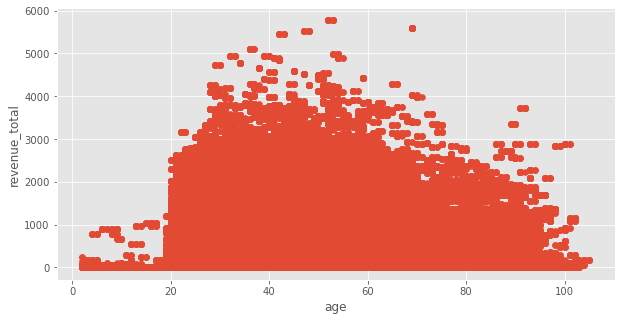

In [28]:
fig, ax = plt.subplots(figsize = (10,5))

x = df['age']
y = df[target]
plt.scatter(x, y)
plt.xlabel('age')
plt.ylabel(target)
plt.show()


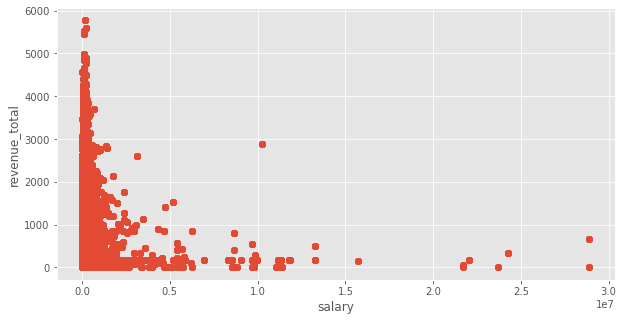

In [30]:
fig, ax = plt.subplots(figsize = (10,5))

x = df['salary']
y = df[target]
plt.scatter(x, y)
plt.xlabel('salary')
plt.ylabel(target)
plt.show()

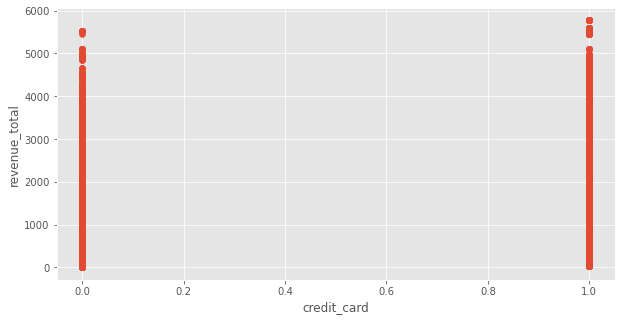

In [33]:
fig, ax = plt.subplots(figsize = (10,5))

x = df['credit_card']
y = df[target]
plt.scatter(x, y)
plt.xlabel('credit_card')
plt.ylabel(target)
plt.show()

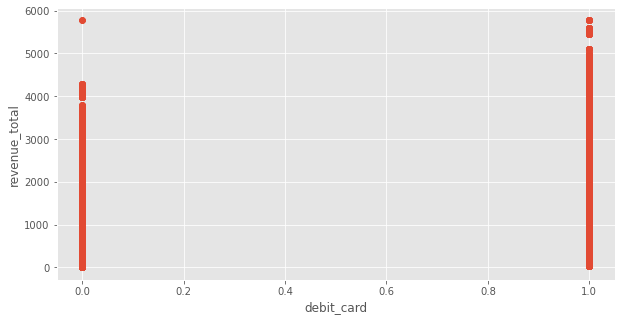

In [34]:
fig, ax = plt.subplots(figsize = (10,5))

x = df['debit_card']
y = df[target]
plt.scatter(x, y)
plt.xlabel('debit_card')
plt.ylabel(target)
plt.show()

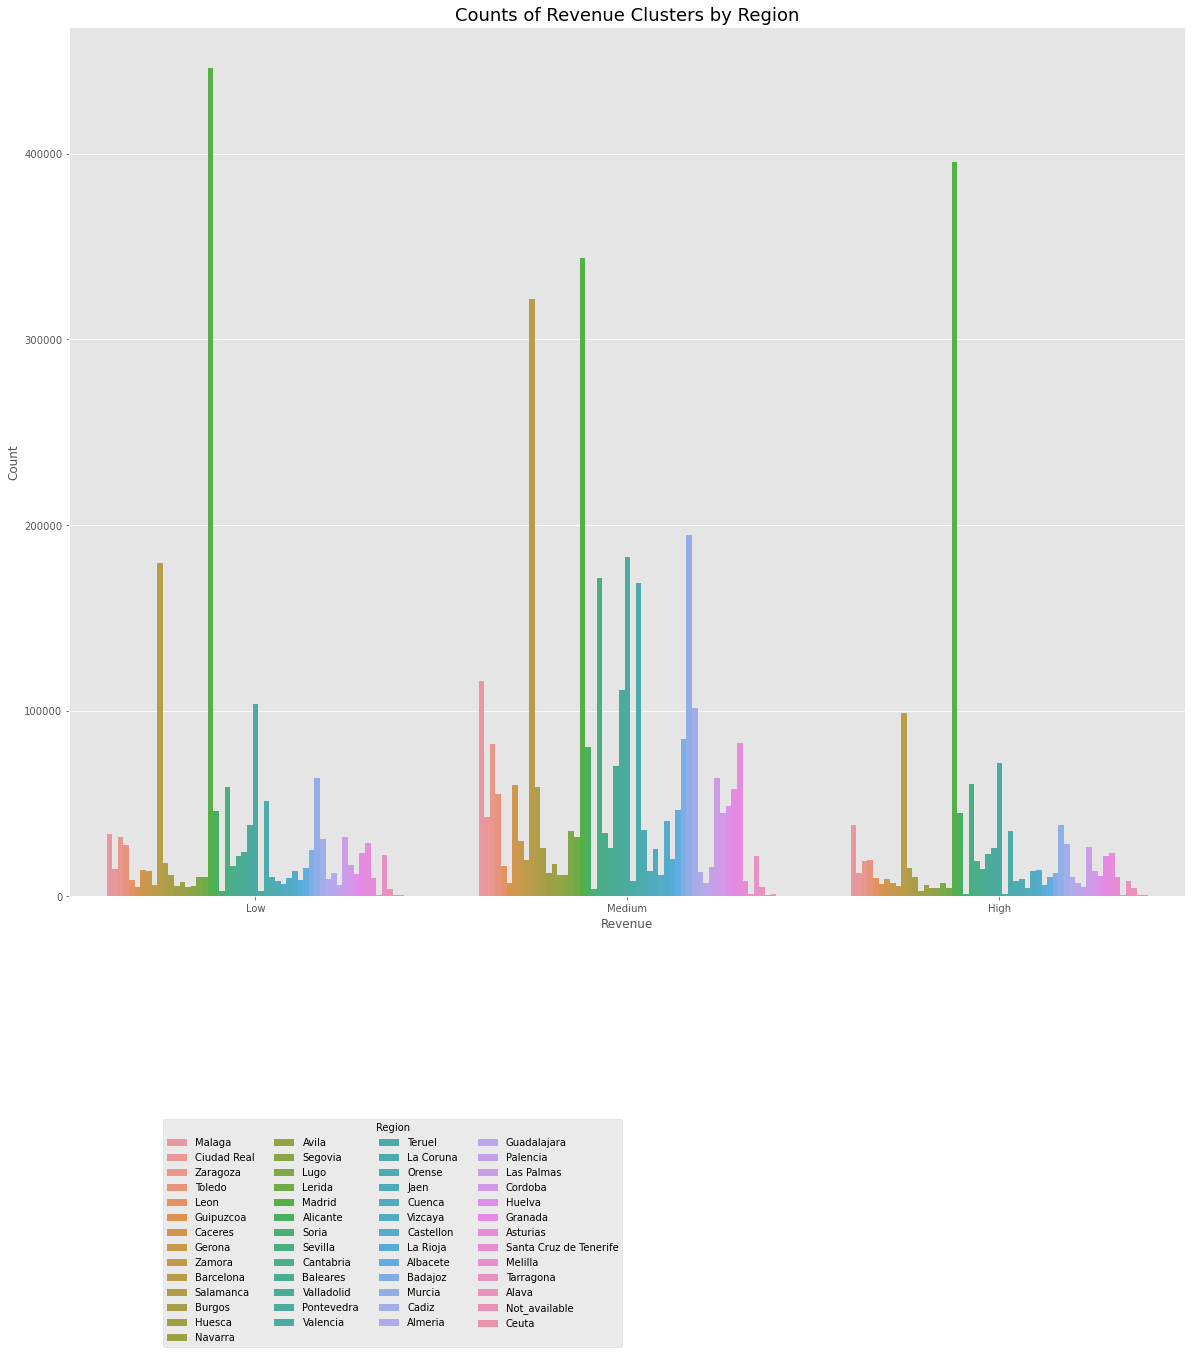

In [46]:
# Create quartile-based clusters for revenue
df['revenue_cluster'], bins = pd.qcut(df[target], q=4, labels=['Low', 'Medium', 'High'], retbins=True, duplicates='drop')


# Plot count of each cluster by region
plt.figure(figsize=(20, 16))

sns.countplot(x='revenue_cluster', hue='region_name', data=df)
plt.title('Counts of Revenue Clusters by Region', fontsize=18)
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.legend(title='Region', bbox_to_anchor=(0.5, -0.25), ncol=4)
plt.show()



In [54]:
# Get frequency counts for categorical variables
for column in ['entry_channel', 'segment', 'country_id', 'gender', 'region_name', 'deceased']:
    print('\n', df[column].value_counts())


 KHE    3113947
KFC     890620
KHQ     590280
KAT     416084
KHK     230197
KHM     176591
KHN     108434
KFA      79020
KHD      75899
RED      60601
KHL      41736
KHF      20657
KHO       8247
KAZ       5635
KHC       5241
KBG       1662
KEH        728
KHP        691
007        613
013        397
KAG        335
KAS        305
KBZ        198
KAA        193
KAR        157
KAY        149
KAF        123
KAB         95
KFD         91
KCC         89
KAW         65
KAQ         52
KDH         51
KAE         48
KCH         48
KCB         47
KAD         45
KAM         43
KAH         40
KAK         34
KAJ         33
KDT         23
KFF         22
KBO         21
KEY         20
KGC         17
004         17
KFS         17
KCL         17
KBE         17
KBH         17
KFK         17
KGN         17
KCI         17
KGX         17
KDR         16
KFL         13
KBW         12
KBU         11
KAI         11
KCK         11
KBY         11
KES         11
KEJ          8
KHS          5
KDA          2
KFP     

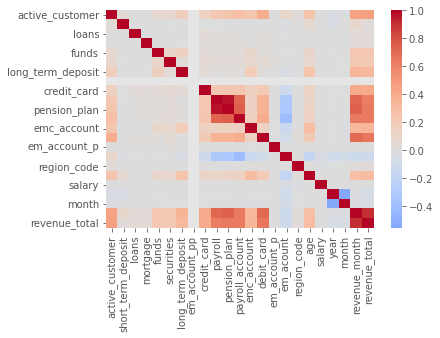

In [66]:
# Plot correlation heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)

In [67]:
# Encode categorical variables
categorical_cols = ['entry_channel', 'region_name']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [71]:
# Standardize numerical variables
# numerical_cols = ['active_customer', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'region_code', 'age', 'salary', 'revenue_month', 'revenue_total']
numerical_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

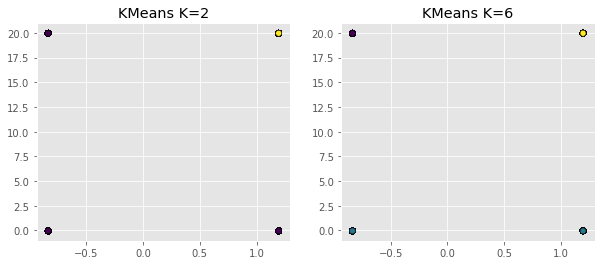

In [72]:
# # Encode categorical variables
# categorical_cols = ['entry_channel', 'region_name']
# df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# # Standardize numerical variables
# numerical_cols = ['active_customer', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities', 'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll', 'pension_plan', 'payroll_account', 'emc_account', 'debit_card', 'em_account_p', 'em_acount', 'region_code', 'age', 'salary', 'revenue_month', 'revenue_total']
# scaler = StandardScaler()
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# # KMeans Clustering
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

X_scaled = df[numerical_cols].values

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Result for K=2
y_predict = KMeans(n_clusters=2, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[0].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[0].set_title('KMeans K=2');

# Result for K=6
y_predict = KMeans(n_clusters=6, n_init=25, random_state=123).fit_predict(X=X_scaled)
ax[1].scatter(
        x = X_scaled[:, 0],
        y = X_scaled[:, 1], 
        c = y_predict,
        #cmap='viridis',
        marker    = 'o',
        edgecolor = 'black'
    )
ax[1].set_title('KMeans K=6');

plt.show()


In [73]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

In [74]:
# Models
# ==============================================================================
model_hclust_complete = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'complete',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
model_hclust_complete.fit(X=X_scaled)

model_hclust_average = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'average',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
model_hclust_average.fit(X=X_scaled)

model_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            distance_threshold = 0,
                            n_clusters         = None
                     )
model_hclust_ward.fit(X=X_scaled)

/Users/agustinagarcia/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



: 

: 

In [ ]:
# Dendrogramas
# ==============================================================================
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
plot_dendrogram(model_hclust_average, color_threshold=0, ax=axs[0])
axs[0].set_title("Distancia euclídea, Linkage average")
plot_dendrogram(model_hclust_complete, color_threshold=0, ax=axs[1])
axs[1].set_title("Distancia euclídea, Linkage complete")
plot_dendrogram(model_hclust_ward, color_threshold=0, ax=axs[2])
axs[2].set_title("Distancia euclídea, Linkage ward")
plt.tight_layout();

In [ ]:


# Step 3: Segmentation
# Find optimal number of clusters using elbow method
inertias = []
ks = range(1, 11)
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow plot')
plt.show()

# Based on the elbow plot, we can choose the optimal number of clusters (k=4 in this case)
model = KMeans(n_clusters=4)
model.fit(df)
df['cluster'] = model.labels_

# Visualize the clusters using a scatter plot
sns.scatterplot(x='age', y='salary', hue='cluster', data=df)
plt.show()


## 4. Create a Model to identify the most important features to predict revenue